<a href="https://colab.research.google.com/github/Fhayes3/ds-projects/blob/main/Fred_HayesProject_INNHotels_FullCode_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

Loading in the code for the data set and the model

## Data Overview

- Observations
- Sanity checks

In [ ]:
hotel = pd.read_csv('INNHotelsGroup.csv') 
dr = hotel.copy()

Loading in the data set

In [ ]:
dr.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
dr.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


Displaying the first and last five rows of the data

In [ ]:
dr.shape

(36275, 19)

Displaying the shape of the data. 19 Columns and 36275 rows

In [ ]:
dr.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Checking the data for Null Values. No nulls present.

In [ ]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Checking data types. Just a few objects, mostly numbers. This will be helpful as we move along.

In [ ]:
dr.duplicated().sum()

0

Checking the data for duplicates. No duplicates are present in the data.

In [ ]:
dr.drop("Booking_ID", axis=1, inplace=True)
dr.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


At this point, I will drop the Booking ID since it cannot help in the analysis or the model.

In [ ]:
dr.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000
mean,1.84496,0.10528,0.81072,2.20430,0.03099,85.23256,2017.82043,7.42365,15.59700,0.02564,0.02335,0.15341,103.42354,0.61966
std,0.51871,0.40265,0.87064,1.41090,0.17328,85.93082,0.38384,3.06989,8.74045,0.15805,0.36833,1.75417,35.08942,0.78624
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2017.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2.00000,0.00000,0.00000,1.00000,0.00000,17.00000,2018.00000,5.00000,8.00000,0.00000,0.00000,0.00000,80.30000,0.00000
50%,2.00000,0.00000,1.00000,2.00000,0.00000,57.00000,2018.00000,8.00000,16.00000,0.00000,0.00000,0.00000,99.45000,0.00000
75%,2.00000,0.00000,2.00000,3.00000,0.00000,126.00000,2018.00000,10.00000,23.00000,0.00000,0.00000,0.00000,120.00000,1.00000
max,4.00000,10.00000,7.00000,17.00000,1.00000,443.00000,2018.00000,12.00000,31.00000,1.00000,13.00000,58.00000,540.00000,5.00000


Checking the description of the data including medians and quartiles.The max numbers are intersting as many will be outliers.

In [ ]:
#Code to display a summary of object variables
dr.describe(include=['object'])

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,27835,28130,23214,24390


Interesting display of the data options for the object variables. This provides us with the number of options and the most popular selection of each. Online booking being the most popular makes a great deal of sense and Not Canceled being the most popular option for booking status also makes sense.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Code to enhance EDA Plots

In [ ]:
#Code to create a display featuring both a boxplot and a histogram 
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

    ### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

All of the above code will be used in crafting the charts used in EDA.

## Leading Questions

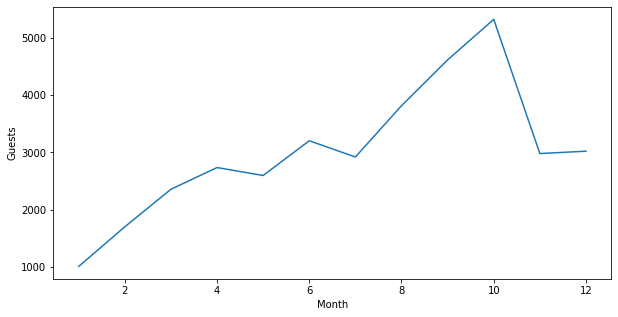

In [ ]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = dr.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

**1. What are the busiest months in the hotel?**<br>
The busiest months at the hotel tend to be in the Autumn with August, September, and October seeing the highest spikes and the Winter months of January, February, and March being the slowest.



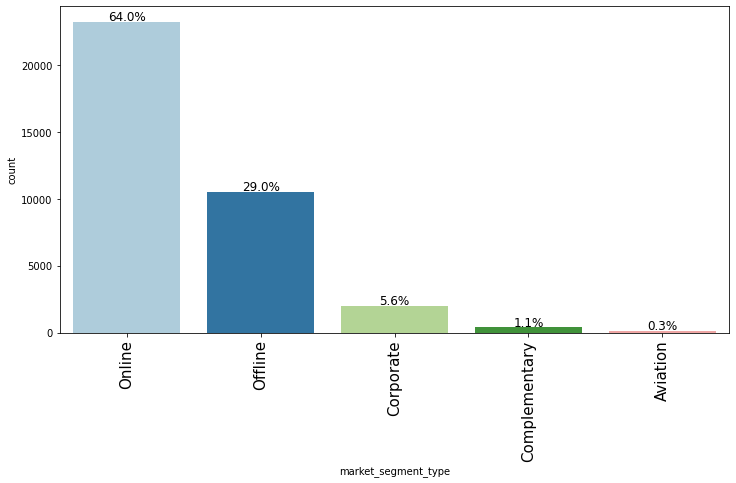

In [ ]:
labeled_barplot(dr, "market_segment_type", perc=True, n=10)

**2. Which market segment do most of the guests come from?**<br>
The vast majority of guests come from the Online segment. Online accounts for 64% of bookings, more than twice the number from the second largest of Offline which accounts for 20%. Corporate and Avaiation account for 5.6% and .3% respectively. Both of these areas might be worth exploring for potential growth via better establishing relationships with local business leaders and any airlines using the local airport as a hub.

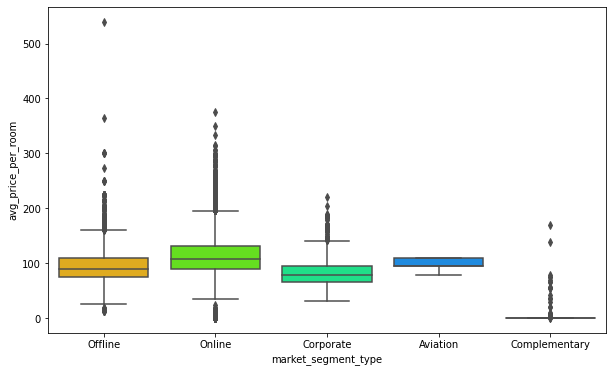

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=dr, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**<br>Looking at this we can see that complementary are the lowest for obvious reasons. At a guess, I would say that the outliers revolve around upgrades. The segment with the lest variation is Aviation which I would guess is because our partners at the airlines book on a flat rate. Corporate rates come next and have a fairly narrow scope with the lowest average price per room not being comped. Corporate accounts often book in bulk and that could account for the lower average price per room. Online and offline both share a large amount of outliers. This could be accounted for by lead time, booking region and whether the booking was during peak season for the hotel. Online customers paid the highest median rate but that could be accounted for by fees incurred to the booking site.

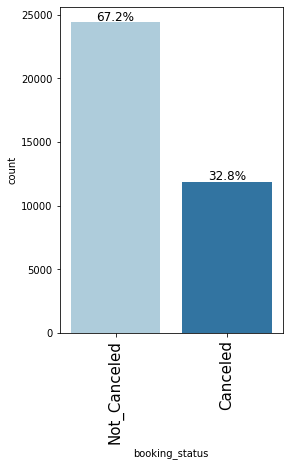

In [ ]:
labeled_barplot(dr, "booking_status", perc=True,)

**4. What percentage of bookings are canceled?**<br>A remarkable 32.8% of bookings are cancelled. See it this high practically begs for some sort of required feedback questionnaire for customers seeking to cancel a booking. 

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


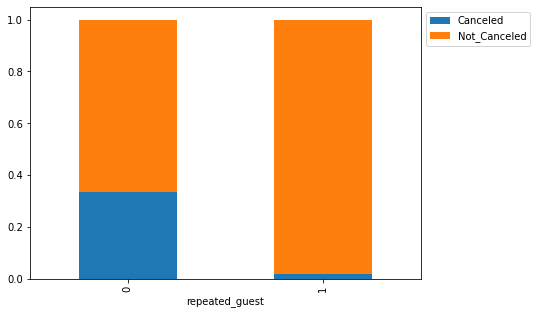

In [ ]:
stacked_barplot(dr, "repeated_guest", "booking_status")

**5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**<br>
Cancellations for repeated guests are a mere 1.7% while guests who have never stayed at the hotel before cancel at a rate 33.6%. The obvious takeaway here is that brand loyalty is alive and well. The trick is building it as only 2.6 of those who book have ever booked before.


booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


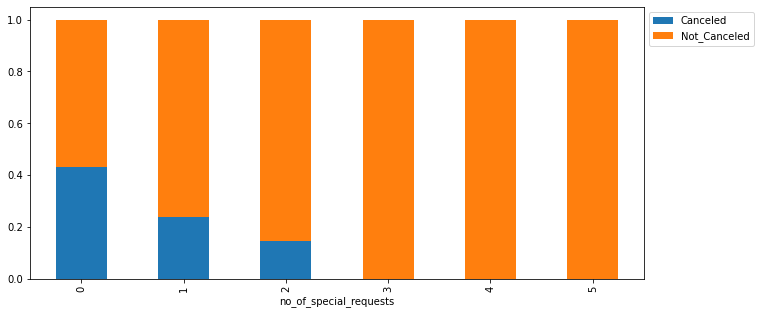

In [ ]:
stacked_barplot(dr, "no_of_special_requests", "booking_status")

**6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**<br> Interestingly enough, the more special requests a guest makes, the more likely they are to keep their reservation.Those with zero requests cancel 43% of the time while those making as little as two requests cancel a mere 14.6% of the time and those numbers continue to fall as the number of requests continue to rise.

## Univariate Analysis

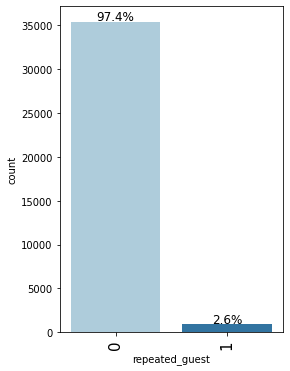

In [ ]:
labeled_barplot(dr, "repeated_guest", perc=True,)

**Percentage of Repeated Guests**<br>As stated in the analysis above, brand loyalty is sorely lacking and is a real area of opportunity for the hotel.

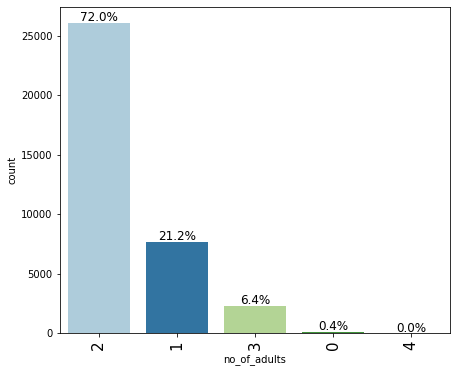

In [ ]:
labeled_barplot(dr, "no_of_adults", perc=True)


**Guests by Number of Adults**<br>The hotel is very popular with couples. Nearly two thirds of all guests come in bands of two followed by single people at just over 21% and groups of three at 6.4%.

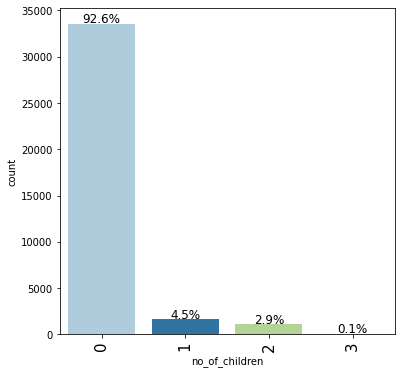

In [ ]:
dr["no_of_children"] = dr["no_of_children"].replace([9, 10], 3)
labeled_barplot(dr, "no_of_children", perc=True)

**Guests by Number of Children**<br>The hotel is clearly not popular with children as 92.6% of guests check in without them.

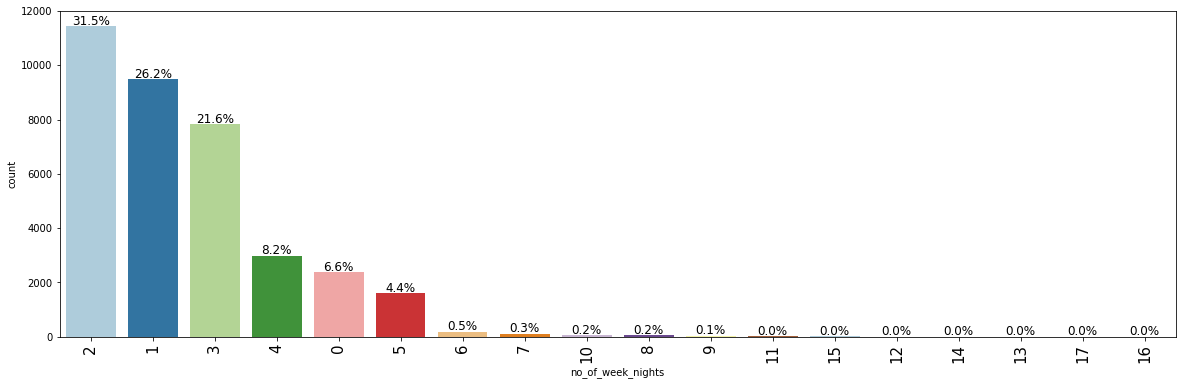

In [ ]:
labeled_barplot(dr, "no_of_week_nights", perc=True)

**Stays by Number of Week Nights**<br>While two night stays during the week are most popular with the hotel's guests, short-term week day stays are mostly the rule with 78.8% of stays being three week days or less and 6.6% of stays containing no week days at all. We shall examine week end stays next and total duration of stays later in this analysis.

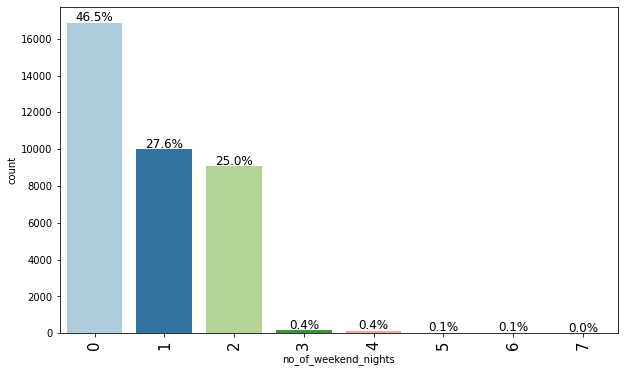

In [ ]:
labeled_barplot(dr, "no_of_weekend_nights", perc=True)

**Stays by Number of Weekend Nights**<br>This was a bit surprising as I might have expected to see a larger number for 1 and 2 weekend day stays given the story the data told us in the week night section of this analysis. 52.6% of stays involve 1 or 2 weekend days. 46.5% of stays involve no weekend days at all but perhaps the most interesting data point here is the outlier where .2% of stays involve 5 or 6 weekend days meaning the stays lasted more than 2 weeks.

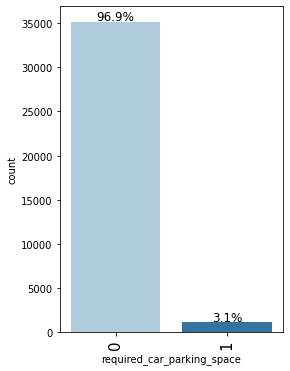

In [ ]:
labeled_barplot(dr, "required_car_parking_space", perc=True)

**Stays Requiring a Parking Space**<br>Only 3.1% of guests require the use of a parking space. This could be a product of the hotel's location. Hotels near major attractions or city centers with good mass transit access rarely require the use of cars. The same is true of resort hotels that are destinations in and of themselves.

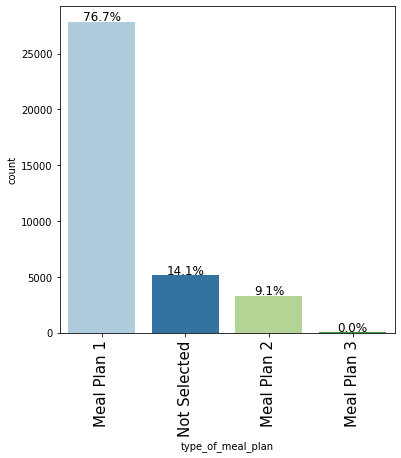

In [ ]:
labeled_barplot(dr, "type_of_meal_plan", perc=True)

**Meal Plan by Stay**<br>As is to be expected, the most common meal plan is the breakfast-only option with 76.7% of guests opting for that one, 14.1% opting out of any meal at all and 9.1% opting if for breakfast plus one meal.

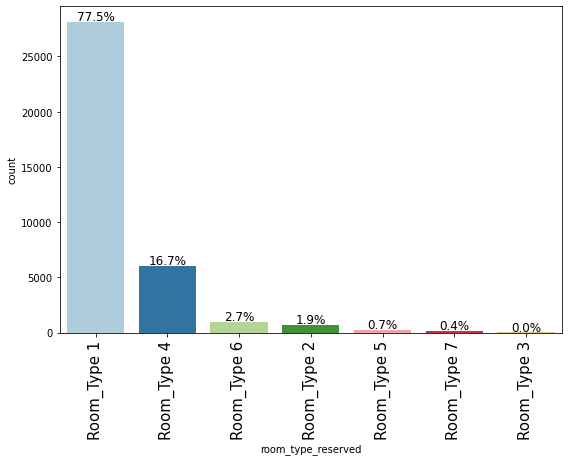

In [ ]:
labeled_barplot(dr, "room_type_reserved", perc=True)

**Room Type by Stay**<br>This bit of analysis is trickier than most of the others as we are only given the code for each room type without any explanation of what it means. We can see that Room Type 1 is popular with 77.5% of those who book at the hotel select that one while 16.7% select Room Type 4 with the others combine for a mere 5.7% of bookings.

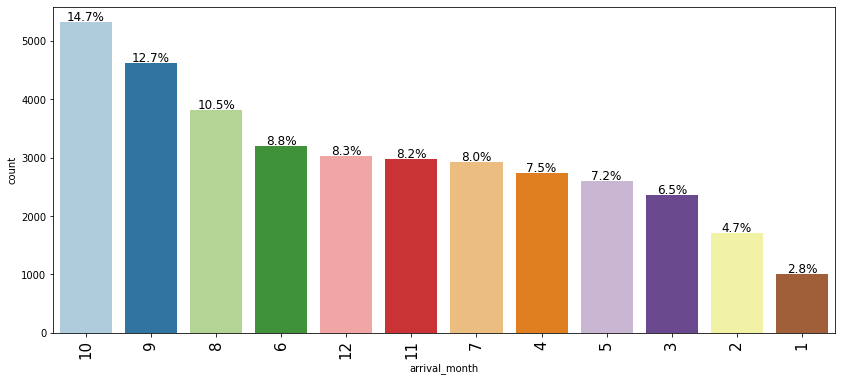

In [ ]:
labeled_barplot(dr, "arrival_month", perc=True)

**Arrival Month**<br>As discussed in an earlier bit of analysis, October, September, and August are the hotel's most popular months for checking in while January, February, and March are the hotel's least popular months.

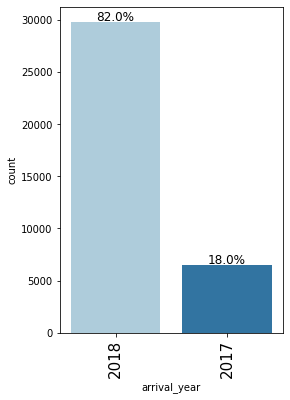

In [ ]:
labeled_barplot(dr, "arrival_year", perc=True)

**Arrival Year**<br>Of the two years available in the data, we can see that there was 64% growth in reservations between 2017 and 2018. I would be truly curious to see data for either 2019 or 2016 to provide deeper context.

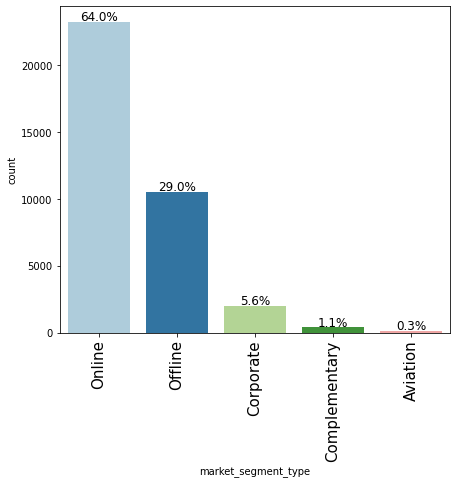

In [ ]:
labeled_barplot(dr, "market_segment_type", perc=True)

**Booking by Market Segment Type**<br>This is another data point that we have already discussed. Online bookings account for 64% of all custom which makes perfect sense in the era we live in. Corporate and Aviation present new potential markets to cultivate.

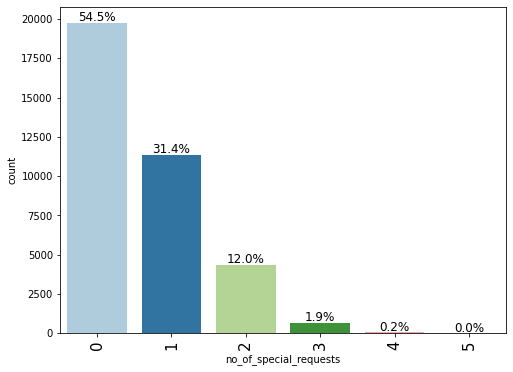

In [ ]:
labeled_barplot(dr, "no_of_special_requests", perc=True)

**Special Requests by Booking**<br>More than half of all bookings make no special requests at all while another 43.4% make between one and two. No data is provided on the popularity of any particular special request but we know that the more requests made, the less likely the booking is to be cancelled.

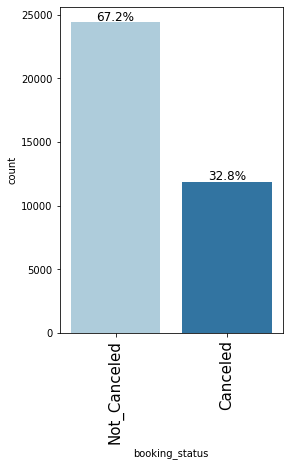

In [ ]:
labeled_barplot(dr, "booking_status", perc=True)

**Booking Status**<br>About one third of all bookings are cancelled. Hopefully, by the time this project is complete we will have a mechanism for predicting which ones will be cancelled in the future.

## Bivariate Analysis

In [ ]:
#Code to replace booking status with 1's and 0's for better processing
dr["booking_status"] = dr["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

The above code will be used to replace the Booking Status with 1's and 0's so that we can make better use of it in both Multivariate Analysis and the modeling process.

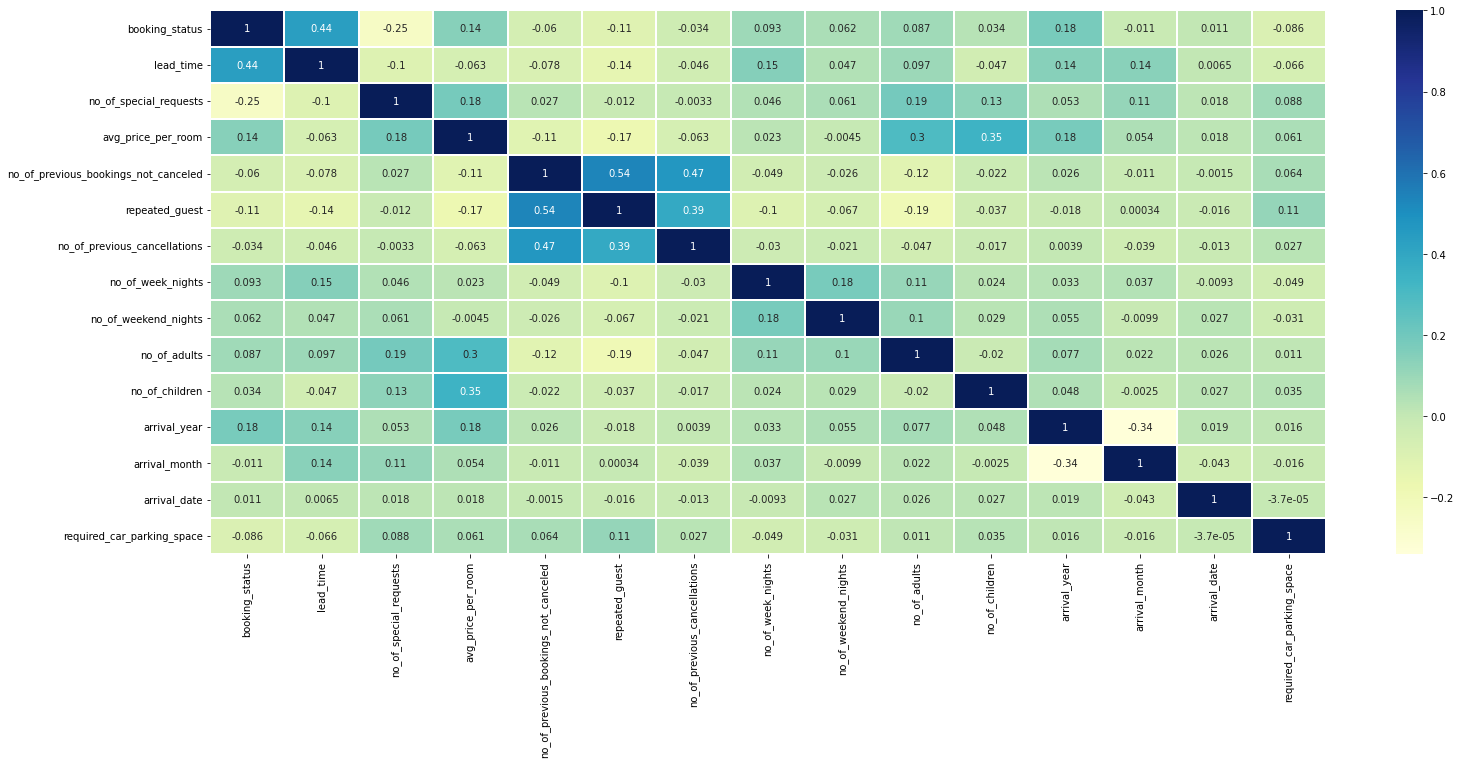

In [ ]:
#Custom code to build a heat map. I chose this to control the order of the data points
plt.figure(figsize = (25,10))
sns.heatmap(data=dr[['booking_status','lead_time', 'no_of_special_requests','avg_price_per_room','no_of_previous_bookings_not_canceled','repeated_guest','no_of_previous_cancellations','market_segment_type','no_of_week_nights','no_of_weekend_nights','no_of_adults','no_of_children', 'arrival_year', 'arrival_month', 'arrival_date','required_car_parking_space']].corr(), annot=True, linewidths=1, cmap='YlGnBu');

**Heatmap of Relevant Data**<br>As far as booking status goes, we see positive correlations with Lead Time, Average Price Per Room, Number of Week Nights, Number of Weekend Nights, Number of Adults, and Number of Children. We see negative correlations with Number of Special Requests, Number of Previous Bookings Not Cancelled, Repeated Guest, and Number of Previous Cancellations. The last three make sense since they are all related.

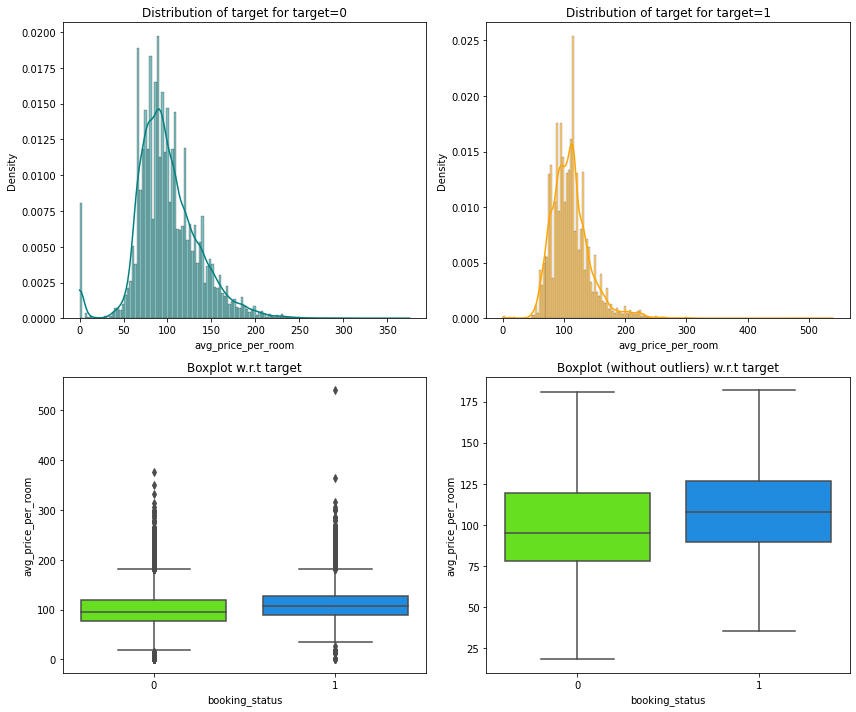

In [ ]:
distribution_plot_wrt_target(dr, "avg_price_per_room", "booking_status")

**Average Price Per Room and Booking Status**<br>We can see here that the average price of a cancelled booking is slightly higher than that of one that is not cancelled. This could be the result of a customer finding a cheaper room at a competitor and changing their reservation accordingly. 

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


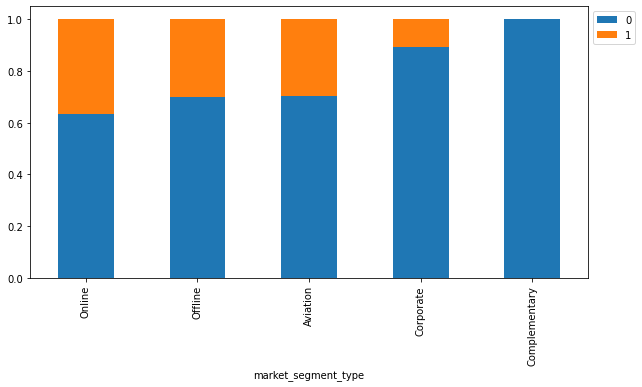

In [ ]:
stacked_barplot(dr, "market_segment_type", "booking_status")

**Market Segment and Booking Status**<br>Usurprisingly, complementary rooms tend not to be cancelled. Corporate bookings also tend to avoid cacellation as well which is yet another reason to try to grow this segment of the business. Aviation and Offline are nearly even at about 20% a piece. Aviation makes sense since flights tend to change. Online bookings see the most cancellations due to the convenience of travel planning online.

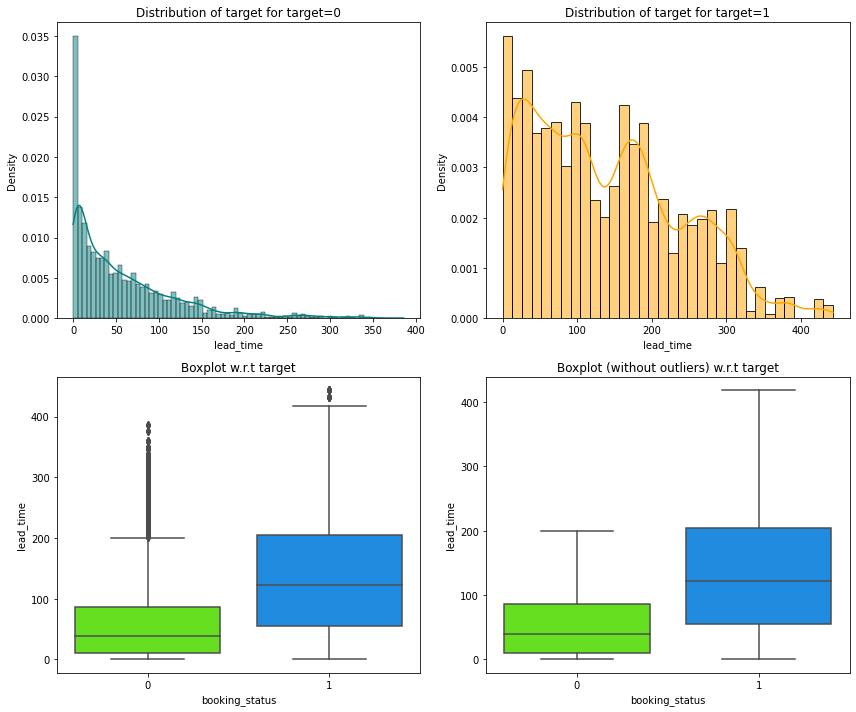

In [ ]:
distribution_plot_wrt_target(dr, "lead_time", "booking_status")

**Booking Status and Lead Time**<br>There was a very positive correlation between these two data points in the heat map above and that plays here. The greater the lead time, the more greater the likeyhood of cancellation. This makes sense as travel tends to have MANY moving parts and the longer those parts have to move, the greater the chance changes, adjustments and cancellations will happen.

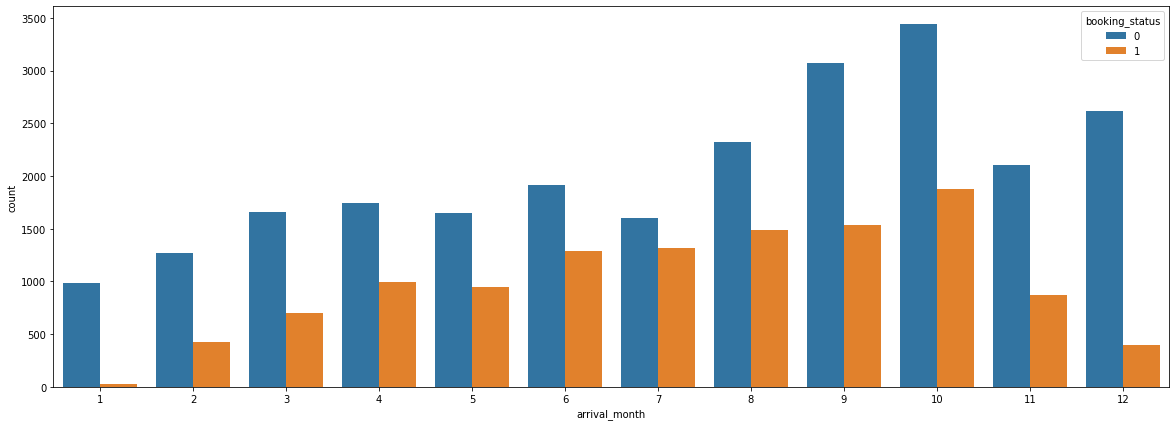

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(data=dr, x='arrival_month', hue='booking_status');

**Booking Status by Month Arrived**<br>November through March seems to be the best stretch for the lowest percentages of cancellations while the Summer months (May, June, July, and August) have the highest percentages.

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

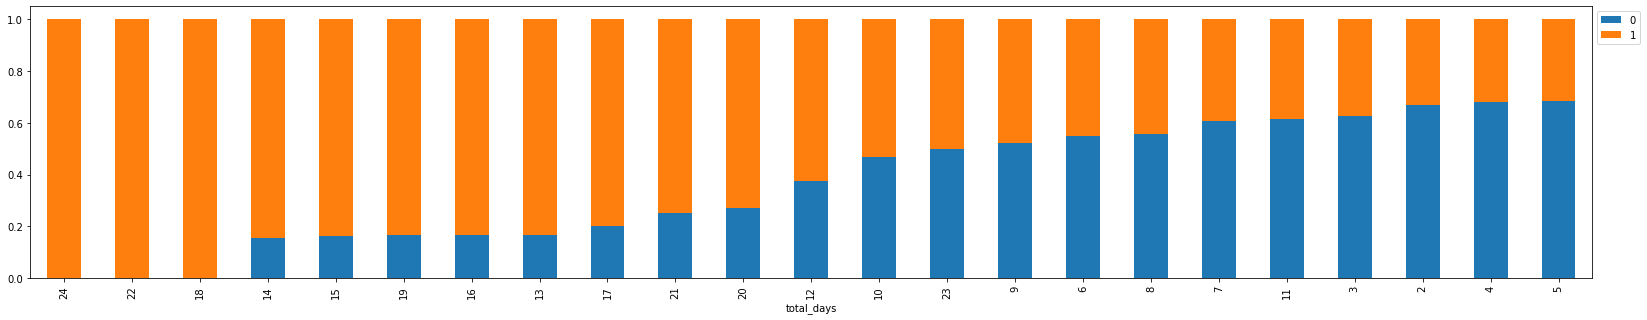

In [ ]:
stay_data = dr[(dr["no_of_week_nights"] > 0) & (dr["no_of_weekend_nights"] > 0)]
stay_data.shape
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)
stacked_barplot(stay_data, "total_days", "booking_status") 

**Total Days Booked and Booking Status**<br>Two to five days seems to be the best window to avoid cancellation. The longer the reservation, the higher the likelyhood of cancellation. The outlier seems to be eleven days has but a higher number of bookings than dates around it and a lower percentage of cancellations.

booking_status      0     1    All
t_guest                           
All             18456  9985  28441
2               15506  8213  23719
3                2425  1368   3793
4                 514   398    912
5                  11     6     17
------------------------------------------------------------------------------------------------------------------------


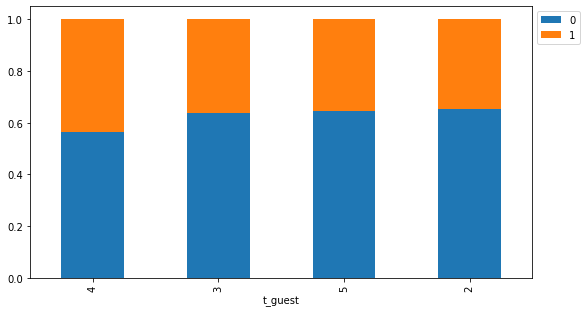

In [ ]:
t_guest_data = dr[(dr["no_of_children"] >= 0) & (dr["no_of_adults"] > 1)]
t_guest_data["t_guest"] = (
    t_guest_data["no_of_adults"] + t_guest_data["no_of_children"]
)
stacked_barplot(t_guest_data, "t_guest", "booking_status") 

**Total Size of Party and Booking Status**<br>Bookended by outliers at eleven and twelve, parties of two, three, and five seem to experience the same level of cancellation. Parties of four come in a little higher but not dramatically so.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [ ]:
# I like to create a copy before doing anything else so that original remains unchanged throughout the process
df = dr.copy()
df.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


Before going any further, I like to make an additional copy of the data and display the head. 

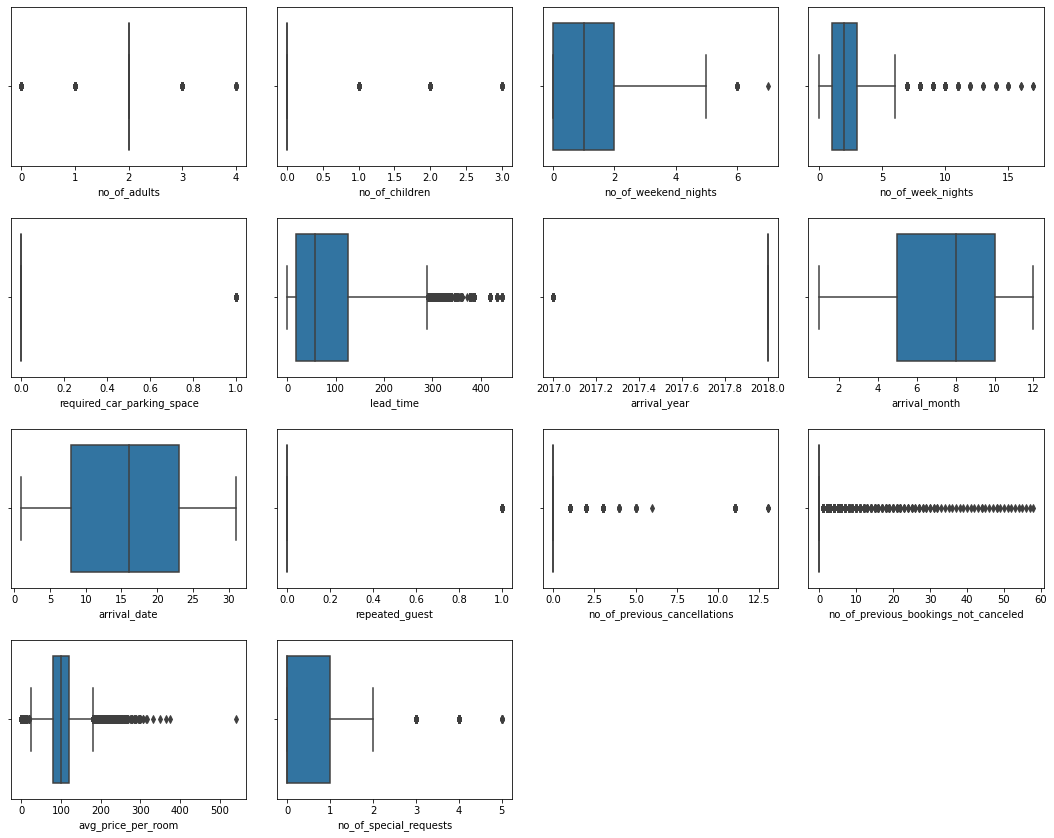

In [ ]:
# outlier detection using boxplot

num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(dr[variable], x=variable)
    plt.tight_layout(pad=2)

plt.show()

The outliers provide interesting data points and appear to be legitimate so we will leave them in place as we continue toward building the model.Please note, Booking Status has been removed from the data for this check since it is the object of our predictions going forward.

## Data Prep for Modeling

In [ ]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, columns = X.select_dtypes(include =["object","category"]).columns.tolist(),
    drop_first=True,)

X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


Splitting the dataset to X and Y. Dropping the Booking Status from both and switching the categorical variables to numerical.

In [ ]:
# Adding a constant to X
X = sm.add_constant(X)

In [ ]:
# Splitting data in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state =1)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


Training and Test have been divided into the usual two thirds/one third split. Class percentages are pretty even as well. 

## EDA

- It is a good idea to explore the data once again after manipulating it.

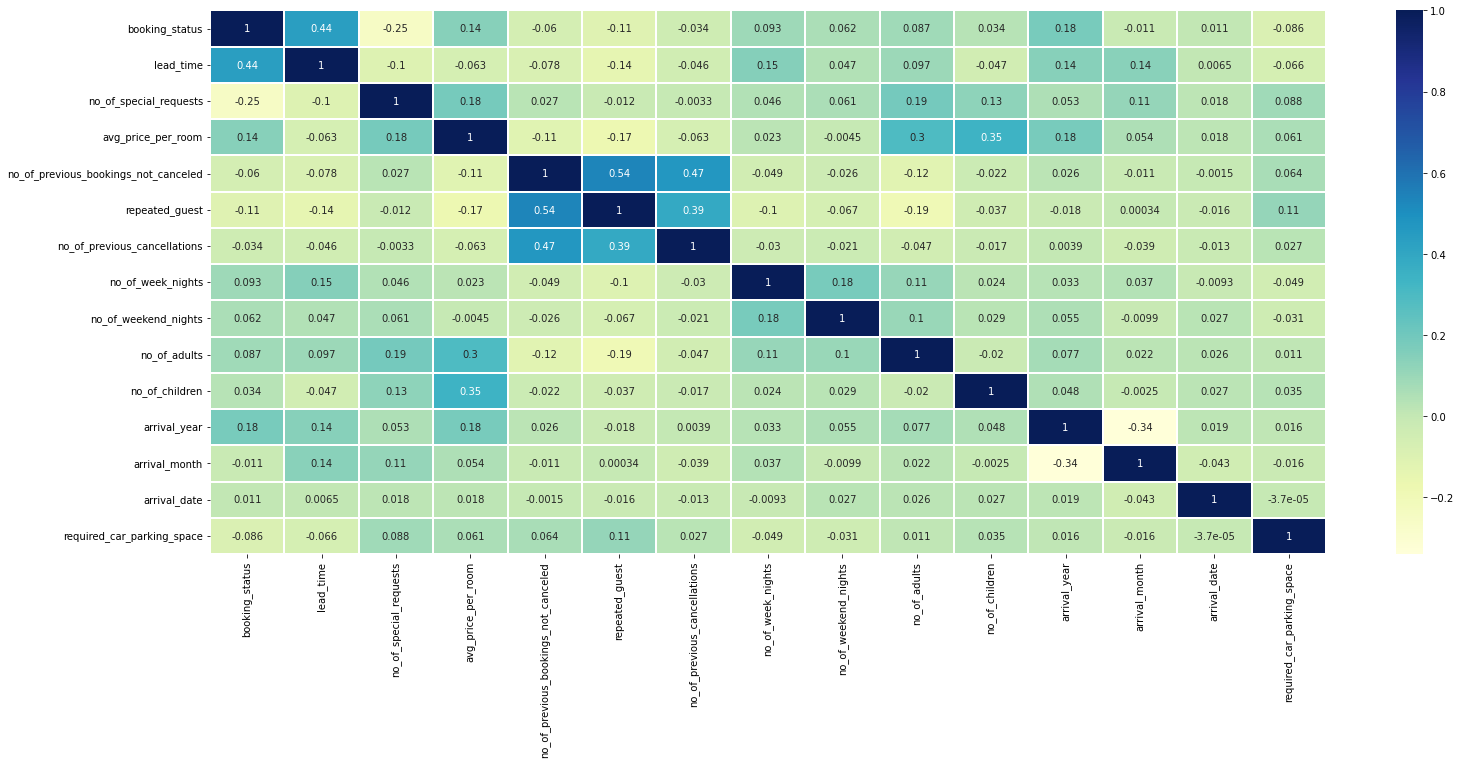

In [ ]:
#Custom code to build a heat map. I chose this to control the order of the data points
plt.figure(figsize = (25,10))
sns.heatmap(data=dr[['booking_status','lead_time', 'no_of_special_requests','avg_price_per_room','no_of_previous_bookings_not_canceled','repeated_guest','no_of_previous_cancellations','market_segment_type','no_of_week_nights','no_of_weekend_nights','no_of_adults','no_of_children', 'arrival_year', 'arrival_month', 'arrival_date','required_car_parking_space']].corr(), annot=True, linewidths=1, cmap='YlGnBu');

Because we have already divided the data into sets and split it on the Booking Status, I will use the next few graphs to look at the relationships between other points in the data.



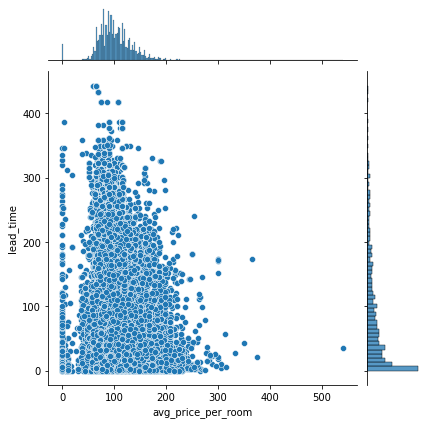

In [ ]:

sns.jointplot(data=df, x='avg_price_per_room', y='lead_time');

**Lead Time and Average Price Per Room**<br>
This shows off the relationship between lead time and average room price. It is pretty clear that the shorter the lead time the higher the average price tends to be.

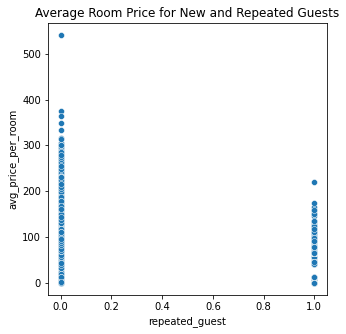

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Average Room Price for New and Repeated Guests')
sns.scatterplot(data=df, x='repeated_guest', y='avg_price_per_room');


**Average Room Price for Repeated and New Guests**<br>This graph displays the lower price on average returning guests pay as opposed to new customers. This could be the result of a loyalty program or something similar.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif
 

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,39474810.78615
1,no_of_adults,1.35079
2,no_of_children,2.09311
3,no_of_weekend_nights,1.06947
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03992
6,lead_time,1.39491
7,arrival_year,1.43107
8,arrival_month,1.27563
9,arrival_date,1.00680


When checking for Multicollinearity, we can see that the data is generally good but we have some issues in the segment type area. We will add some code below to cycle through the data and automatically eliminate the data causing the issue then run the VIF check again to confirm that we can proceed.

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(Y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


The code above evaluates and removes data features with excessive VIF

In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
checking_vif(X_train1)

,feature,VIF
0,const,39199606.80074
1,no_of_adults,1.33342
2,no_of_children,2.09003
3,no_of_weekend_nights,1.06048
4,no_of_week_nights,1.08996
5,required_car_parking_space,1.03921
6,lead_time,1.37597
7,arrival_year,1.42138
8,arrival_month,1.26694
9,repeated_guest,1.53124


Now we run the VIF check again using the amended data set and see that all of our numbers are well below the threshold of 5. We are ready to proceed.

## Building a Classification Model

In [ ]:
# creating a function to compute various metrics so we can check the performance of our classification model
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

    # creating a function to plot the confusion_matrix of our classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

The above functions are used in the creation of a Classification Model and an accompanying Confusion Matrix

In [ ]:
model_1 = DecisionTreeClassifier(random_state=1)
model_1.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

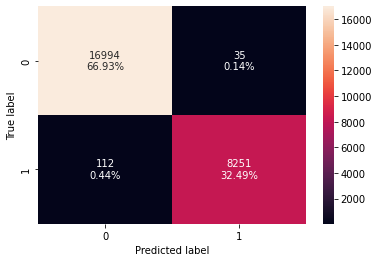

In [ ]:
confusion_matrix_statsmodels(model_1, X_train, Y_train)

**Confusion Matrix Legend**

<br>**True Positive**(Top Left)- Predicts the booking will not be cancelled and the booking is not cancelled - 66.93%
<br>**False Positive**(Top Right)- Predicts the booking will not be cancelled and the booking is cancelled- 0.14%
<br>**True Negative**(Bottom Right)- Predicts the booking will be cancelled and the booking is cancelled- 32.49%
<br>**False Negative** (Bottom Left)-Predicts the booking will be cancelled and the booking is not cancelled- 0.44%<br><br>
To best serve Inn Hotels, we want to minimize both the False Positives and False Negatives so that the hotel knows exactly how many rooms they will need to have prepared and can maximize operational efficiency.<br>To achieve, will focus on the F1 Scores when evaluating our models as this metric balances Precision and Recall and takes both False Positives and False Negatives into account.


## Building a Logistic Regression model

In [ ]:
X1 = df.drop(["booking_status"], axis=1)
Y1 = df["booking_status"]

# adding constant
X1 = sm.add_constant(X)

X1 = pd.get_dummies(
    X1,
    columns = X1.select_dtypes(include =["object","category"]).columns.tolist(),
    drop_first=True,)

# Splitting data in train and test sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state =1)

Let's divide the data up again for modelling purposes.

In [ ]:
# fitting logistic regression model
logit = sm.Logit(Y1_train, X1_train.astype(float))
lg = logit.fit(disp=False) 

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 18 Nov 2022   Pseudo R-squ.:                  0.3293
Time:                        00:54:15   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.2807    120.833     -7.641      0.000   -1160.110    -686.452
no_of_adults                             0.1136      

Train and Test are set. Let's do some performance testing.

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X1_train, Y1_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63422,0.73975,0.68293


The F1 score here is .683 here on a scale of 0 to 1. 

Next, let's move on to check for multicollinearity in the Regression Model.

In [ ]:
checking_vif(X1_train)

,feature,VIF
0,const,39474810.78615
1,no_of_adults,1.35079
2,no_of_children,2.09311
3,no_of_weekend_nights,1.06947
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03992
6,lead_time,1.39491
7,arrival_year,1.43107
8,arrival_month,1.27563
9,arrival_date,1.00680


Seeing the same evidence of Multicollinearity here as above when we checked so we will run feature code below.

In [ ]:
# initial list of columns
cols = X1_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X1_train_aux = X1_train[cols]

    # fitting the model
    model = sm.Logit(Y1_train, X1_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X1_train[selected_features]
X_test1 = X1_test[selected_features]

In [ ]:
#Checking scores again to make sure everything is below 5
checking_vif(X_train1)

,feature,VIF
0,const,39199606.80074
1,no_of_adults,1.33342
2,no_of_children,2.09003
3,no_of_weekend_nights,1.06048
4,no_of_week_nights,1.08996
5,required_car_parking_space,1.03921
6,lead_time,1.37597
7,arrival_year,1.42138
8,arrival_month,1.26694
9,repeated_guest,1.53124


Arrival date, number of previous bookings not cancelled, meal plan 3, room type 3, market segment comp and market segment online have all been purged. All relevant numbers are compliant.

In [ ]:
logit1 = sm.Logit(Y1_train, X1_train.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 18 Nov 2022   Pseudo R-squ.:                  0.3293
Time:                        00:54:20   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.2807    120.833     -7.641      0.000   -1160.110    -686.452
no_of_adults                             0.1136      

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X1_train, Y1_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63422,0.73975,0.68293


F1 Score sits at .683 and remains unchanged.

**Converting Coefficients to Odds**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X1_train.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
Odds,0.00000,1.12034,1.17155,1.11269,1.04058,0.20312,1.01583,1.57825,0.95929,1.00048,0.09560,1.30528,0.84136,1.01895,0.23019,1.19337,49061636.85181,1.32085,0.69706,0.99933,0.75467,0.48779,0.38737,0.24720,0.00000,0.30363,0.11132,0.67098
Change_odd%,-100.00000,12.03413,17.15492,11.26933,4.05798,-79.68798,1.58264,57.82499,-4.07092,0.04799,-90.44036,30.52776,-15.86370,1.89483,-76.98125,19.33715,4906163585.18110,32.08459,-30.29407,-0.06655,-24.53317,-51.22075,-61.26321,-75.28032,-100.00000,-69.63693,-88.86783,-32.90157


Our coefficients in the logistic regression model are in the form of log(odd), so we convert this odd to a percentage by odds = exp(b) and then set our equation to odds = (exp(b)-1)*100.

### Training Set Performance Checks

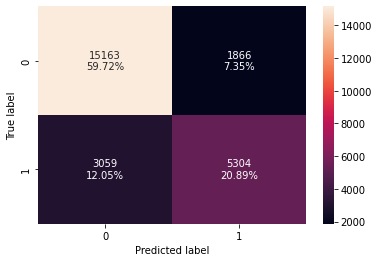

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X1_train, Y1_train)

**True Positive**(Top Left)- 59.72%<br>
**False Positive**(Top Right)- 7.35%<br>
**True Negative**(Bottom Right)- 20.89%<br>
**False Negative** (Bottom Left)- 12.05%

In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X1_train, Y1_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63422,0.73975,0.68293


### New Section ROC-AUC Testing

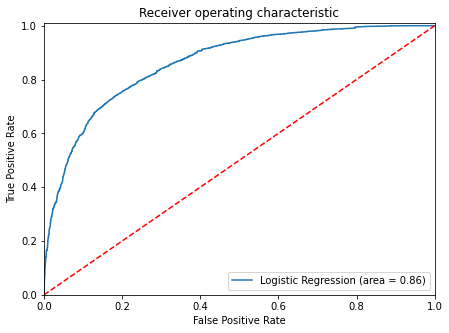

In [ ]:
logit_roc_auc_train = roc_auc_score(Y1_train, lg1.predict(X1_train))
fpr, tpr, thresholds = roc_curve(Y1_train, lg1.predict(X1_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

AUC we are getting is .86 on a 1 - 0 scale. Our predictions look good so far.

## Model Performance Evaluation

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(Y1_train, lg1.predict(X1_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3646366234603478


Optimal model threshold is .36

Training performance:


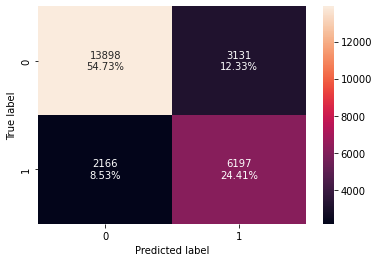

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X1_train, Y1_train, threshold=optimal_threshold_auc_roc 
)
print("Training performance:")

**True Positive**(Top Left)- 54.73%<br>
**False Positive**(Top Right)- 12.33%<br>
**True Negative**(Bottom Right)- 24.41%<br>
**False Negative** (Bottom Left)- 8.53%

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X1_train, Y1_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79139,0.74100,0.66434,0.70058


F1 Score rises a little bit to .7

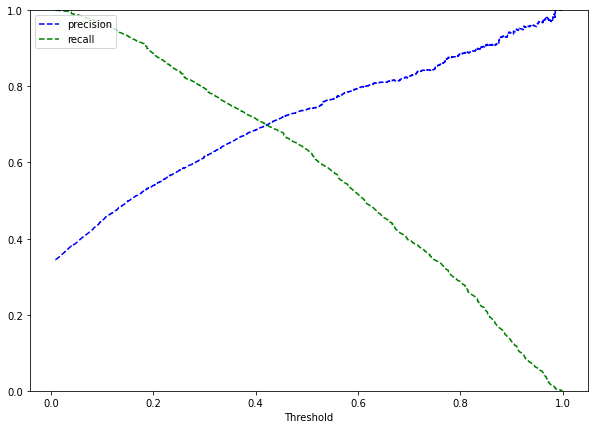

In [ ]:
y_scores = lg1.predict(X1_train)
prec, rec, tre = precision_recall_curve(Y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Our Threshold here is a bit above .4 which is not bad at all.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

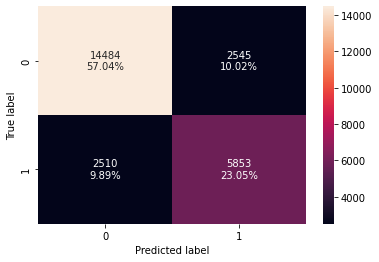

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X1_train, Y1_train, threshold=optimal_threshold_curve 
)

**True Positive**(Top Left)- 57.04%<br>
**False Positive**(Top Right)- 10.02%<br>
**True Negative**(Bottom Right)- 23.05<br>
**False Negative** (Bottom Left)- 9.89%

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X1_train, Y1_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79139,0.74100,0.66434,0.70058


F1 Score still above .7

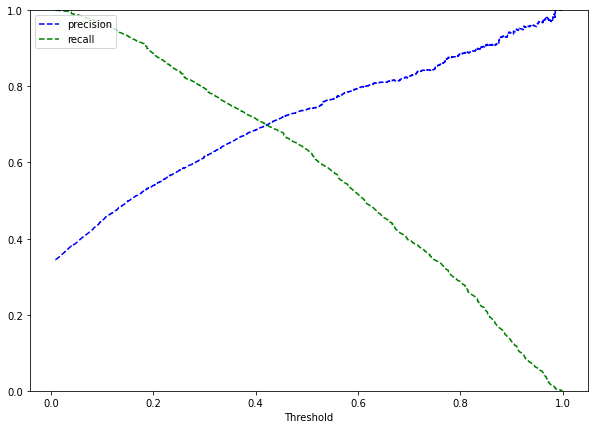

In [ ]:
Y_scores = lg1.predict(X1_train)
prec, rec, tre = precision_recall_curve(Y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Precision and Recall still meet better than .4

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

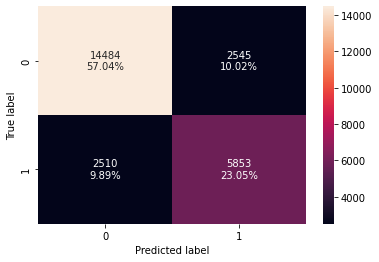

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X1_train, Y1_train, threshold=optimal_threshold_curve 
)

**True Positive**(Top Left)- 57.04%<br>**False Positive**(Top Right)- 10.02%<br>**True Negative**(Bottom Right)- 23.05%<br>**False Negative** (Bottom Left)- 9.89%

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X1_train, Y1_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80092,0.69987,0.69695,0.69841


F1 Score falls below .7 here at the .42 threshold.

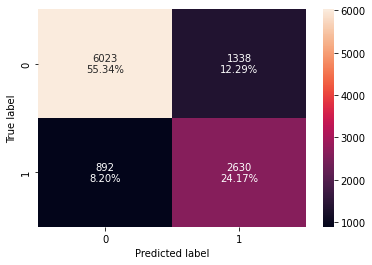

In [ ]:
# creating confusion matrix for test at 036
confusion_matrix_statsmodels(
    lg1, X1_test, Y1_test, threshold=optimal_threshold_auc_roc 
)

**True Positive**(Top Left)- 55.34%<br>**False Positive**(Top Right)- 12.29%<br>**True Negative**(Bottom Right)- 24.17%<br>**False Negative** (Bottom Left)- 8.20%

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X1_test,Y1_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79509,0.74673,0.66280,0.70227


F1 Score jumps back over .7

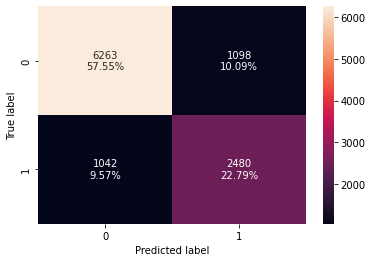

In [ ]:
#Creating confusion matrix for test at 0.42
confusion_matrix_statsmodels(
    lg1, X1_test, Y1_test, threshold=optimal_threshold_curve
)

**True Positive**(Top Left)- 57.55%<br>**False Positive**(Top Right)- 10.09%<br>**True Negative**(Bottom Right)- 22.79%<br>**False Negative** (Bottom Left)- 9.57%

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X1_test,Y1_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80336,0.70415,0.69312,0.69859


F1 Score drops a tiny bit but rounds to .7

## Final Model Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80604,0.79139,0.80092
Recall,0.63422,0.74100,0.69987
Precision,0.73975,0.66434,0.69695
F1,0.68293,0.70058,0.69841


We see here in the comparison that the highest F1 score have is the .37 threshold.

In [ ]:
# test performance comparison
X2_test = X1_test[X1_test.columns].astype(float)

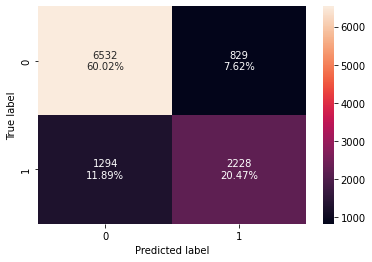

In [ ]:
#creating a confusion matrix
confusion_matrix_statsmodels(lg1, X2_test, Y_test)

**True Positive**(Top Left)- 60.02%<br>**False Positive**(Top Right)- 7.62%<br>**True Negative**(Bottom Right)- 20.47%<br>**False Negative** (Bottom Left)- 11.89%

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X2_test, Y_test
)
print('Test Performance')
log_reg_model_test_perf

Test Performance


,Accuracy,Recall,Precision,F1
0,0.80493,0.63260,0.72882,0.67731


New F1 score is .68

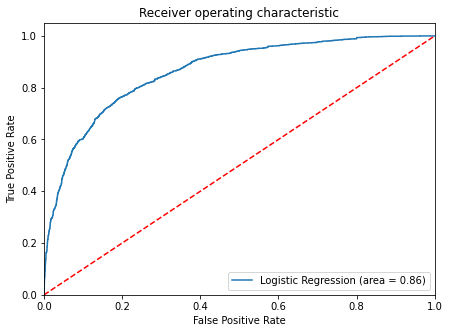

In [ ]:
logit_roc_auc_train = roc_auc_score(Y_test, lg1.predict(X2_test))
fpr, tpr, thresholds = roc_curve(Y_test, lg1.predict(X2_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Curve is strong. The Regression Model appears to be a good one.

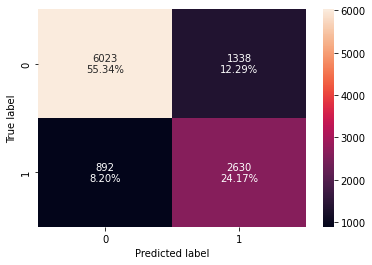

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X2_test, Y_test, threshold=optimal_threshold_auc_roc)

**True Positive**(Top Left)- 55.34%<br>**False Positive**(Top Right)- 12.29%<br>**True Negative**(Bottom Right)- 24.17%<br>**False Negative** (Bottom Left)- 8.2%

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X2_test, Y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79509,0.74673,0.66280,0.70227


F1 score is up over .7 even without rounding.

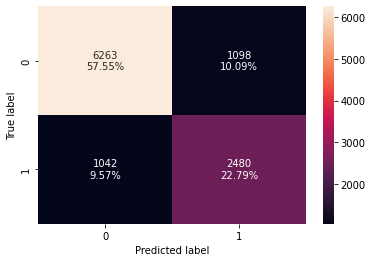

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X2_test, Y_test, threshold=optimal_threshold_curve)

**True Positive**(Top Left)- 57.55%<br>**False Positive**(Top Right)- 10.09%<br>**True Negative**(Bottom Right)- 22.79%<br>**False Negative** (Bottom Left)- 9.57%

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X2_test, Y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80336,0.70415,0.69312,0.69859


F1 slides a little but still sitting at .7 with the round up.

## Building a Decision Tree model

In [ ]:
X3 = df.drop(["booking_status"], axis=1)
Y3 = df["booking_status"]

X3 = pd.get_dummies(X3, drop_first=True)

# Splitting data in train and test sets
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print("Shape of Training set : ", X3_train.shape)
print("Shape of test set : ", X3_test.shape)
print("Percentage of classes in training set:")
print(Y3_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Y3_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


Data has been succesfully split and splits look good.

In [ ]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X3_train, Y3_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
#Function code for the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

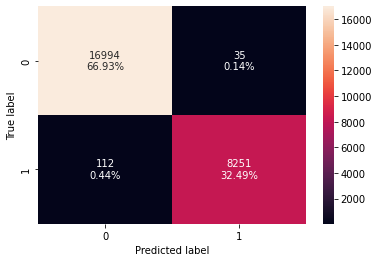

In [ ]:
confusion_matrix_sklearn(model1, X3_train, Y3_train)

**True Positive**(Top Left)- 66.93%<br>**False Positive**(Top Right)- .14%<br>**True Negative**(Bottom Right)- 32.49%<br>**False Negative** (Bottom Left)- .44%

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(model1, X3_train, Y3_train)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


F1 is almost a perfect 1 score.

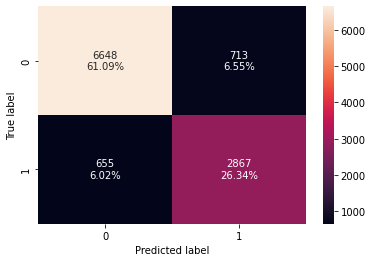

In [ ]:
confusion_matrix_sklearn(model1, X3_test, Y3_test)

**True Positive**(Top Left)- 61.09%<br>**False Positive**(Top Right)- 6.55%<br>**True Negative**(Bottom Right)- 26.34%<br>**False Negative** (Bottom Left)- 6.02%

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(model1, X3_test, Y3_test)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.87430,0.81403,0.80084,0.80738


F1 Score still VERY strong at .81


**Before pruning the tree let's check the important features.**

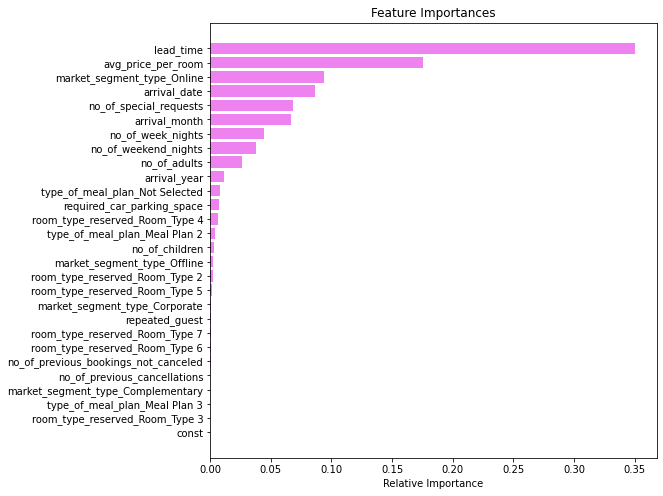

In [ ]:
feature_names = list(X3_train.columns)
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Lead time is far and away the most important data point followed by average price per room and online booking as a distant third.

## Do we need to prune the tree?

In [ ]:
#Functions to use before pruning
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X3_train, Y3_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X3_train, Y3_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

Checking performance on training set

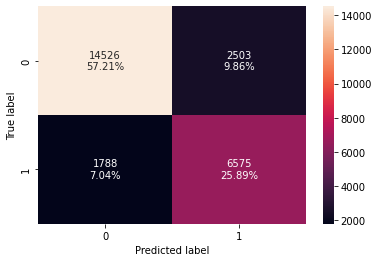

In [ ]:
confusion_matrix_sklearn(estimator, X3_train, Y3_train)

**True Positive**(Top Left)- 57.21%<br>**False Positive**(Top Right)- 9.86%<br>**True Negative**(Bottom Right)- 25.89%<br>**False Negative** (Bottom Left)- 7.04%

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X3_train, Y3_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83101,0.78620,0.72428,0.75397


F1 Score is a solid 7.5



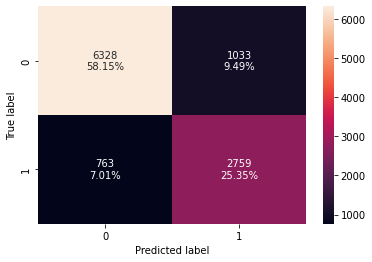

In [ ]:
confusion_matrix_sklearn(estimator, X3_test, Y3_test)

**True Positive**(Top Left)- 58.15%<br>**False Positive**(Top Right)- 9.49%<br>**True Negative**(Bottom Right)- 25.35%<br>**False Negative** (Bottom Left)- 7.01%

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X3_test, Y3_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


F1 Score coming in at .75

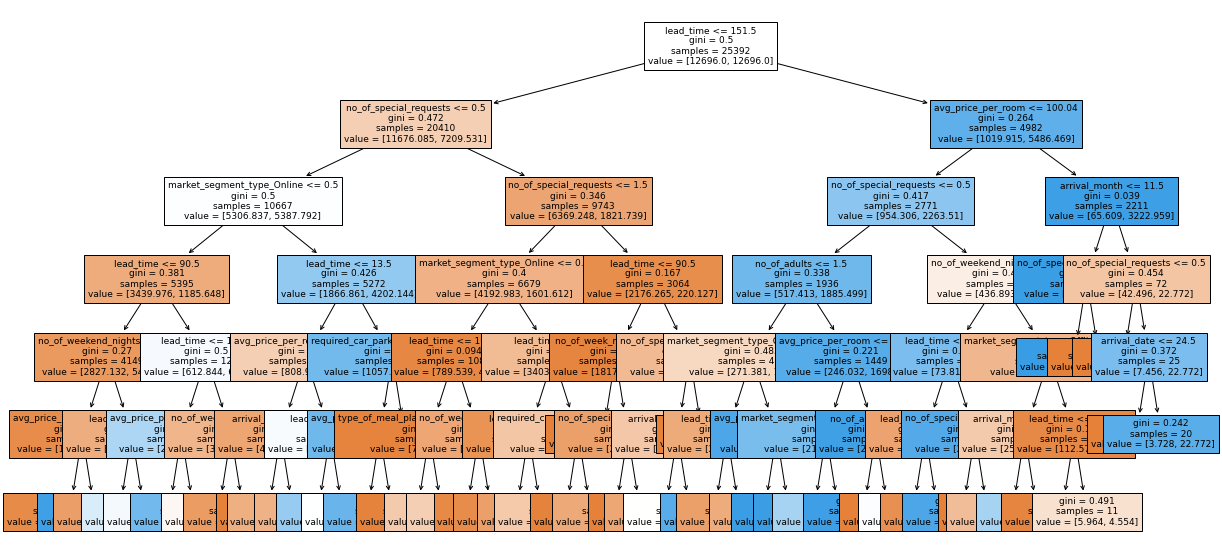

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Visualizing the Tree shows just how overly complex it is.

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

The text only respresentation of the Tree is another method of viewing the Tree's complexity.

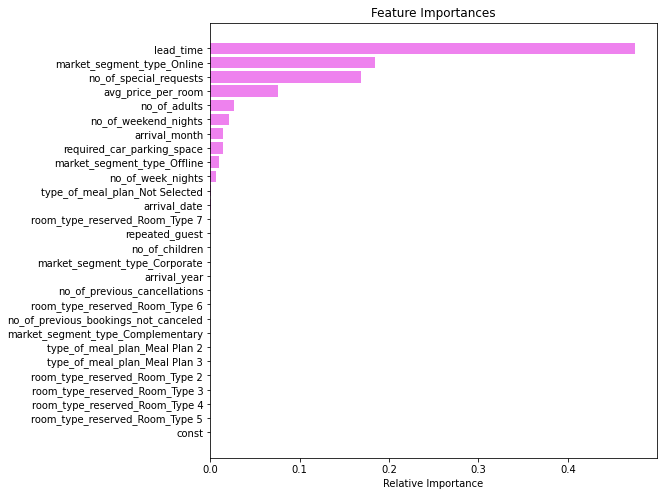

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Interestingly enough, Average Price is much less of an issue here but Lead Time remains hugely important.

## Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X3_train, Y3_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,-0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1834,0.00890,0.32806
1835,0.00980,0.33786
1836,0.01272,0.35058
1837,0.03412,0.41882


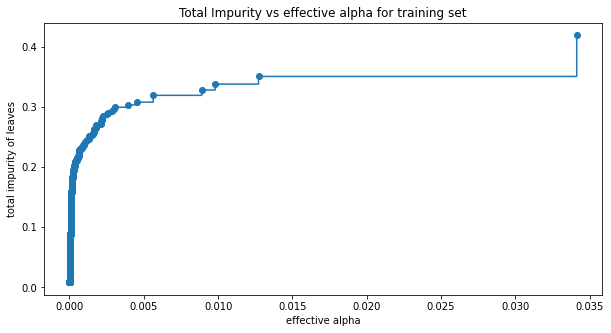

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X3_train, Y3_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


Let's remove the last element in the clfs and ccp_alphas because a tree with one node it not useful.

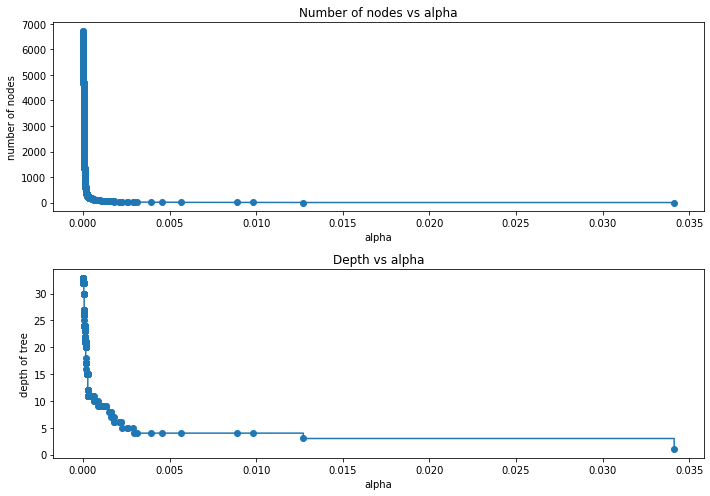

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

The number of nodes plumets as the alpha increases until around .003 when everything begins to stabilize.

### F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X3_train)
    values_train = f1_score(Y3_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X3_test)
    values_test = f1_score(Y3_test, pred_test)
    f1_test.append(values_test)

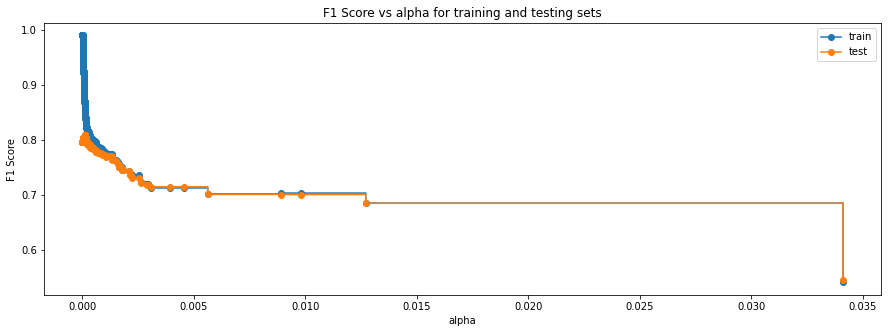

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Test and Train seem to be very well matched and the F1 score stays at or above .7 until the alpha reaches .013.

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001333884457584535, class_weight='balanced',
                       random_state=1)


The CCP Alpha is .000133. That makes it our best model.

## Model Performance Comparison and Conclusions

F1 Score vs alpha for training and testing sets

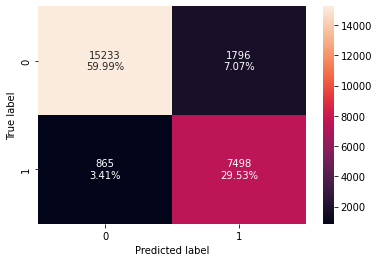

In [ ]:
confusion_matrix_sklearn(best_model, X3_train, Y3_train)

**True Positive**(Top Left)- 59.99%<br>**False Positive**(Top Right)- 7.07%<br>**True Negative**(Bottom Right)- 29.53%<br>**False Negative** (Bottom Left)- 3.41%

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X3_train, Y3_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89520,0.89657,0.80676,0.84929


F1 Score at .85 looks great!

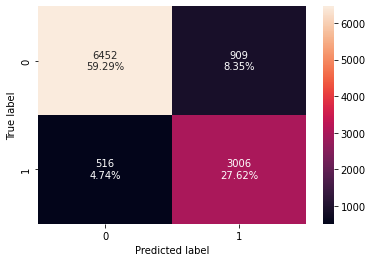

In [ ]:
confusion_matrix_sklearn(best_model, X3_test, Y3_test)

**True Positive**(Top Left)- 59.25%<br>**False Positive**(Top Right)- 8.35%<br>**True Negative**(Bottom Right)- 27.62%<br>**False Negative** (Bottom Left)- 4.74%

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X3_test, Y3_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86906,0.85349,0.76782,0.80839


F1 Score on Test is .81. Still looks great.

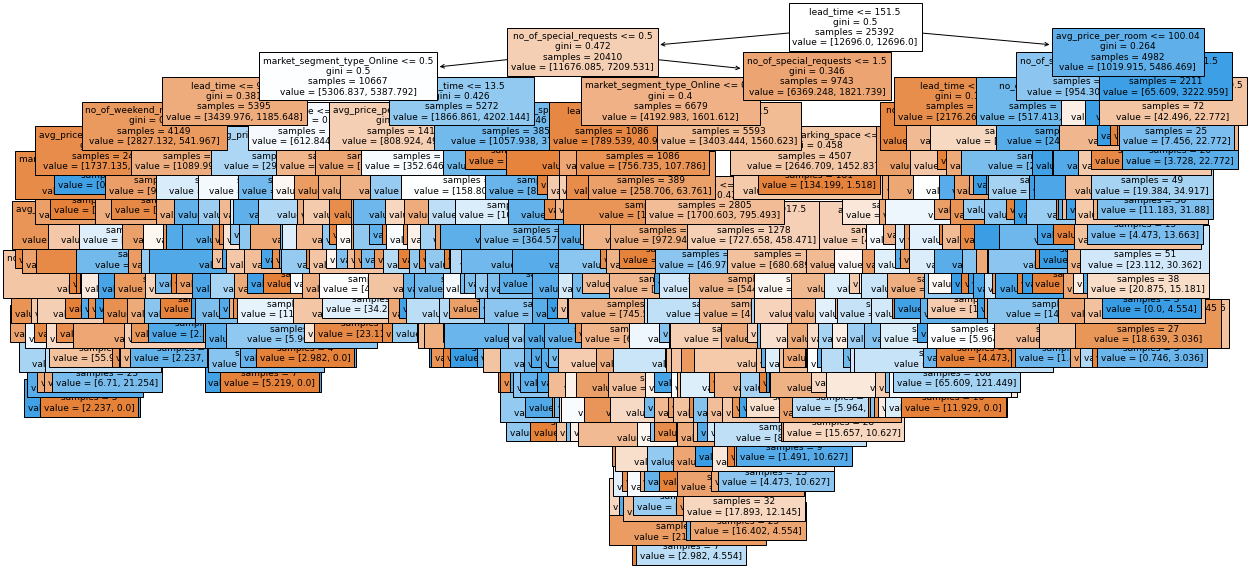

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Graphic representation of the Decision Tree model from the last version of the data set.

In [ ]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

And another look at the Decision Tree Model. You can see how much shorter it is than the one created further up the document.

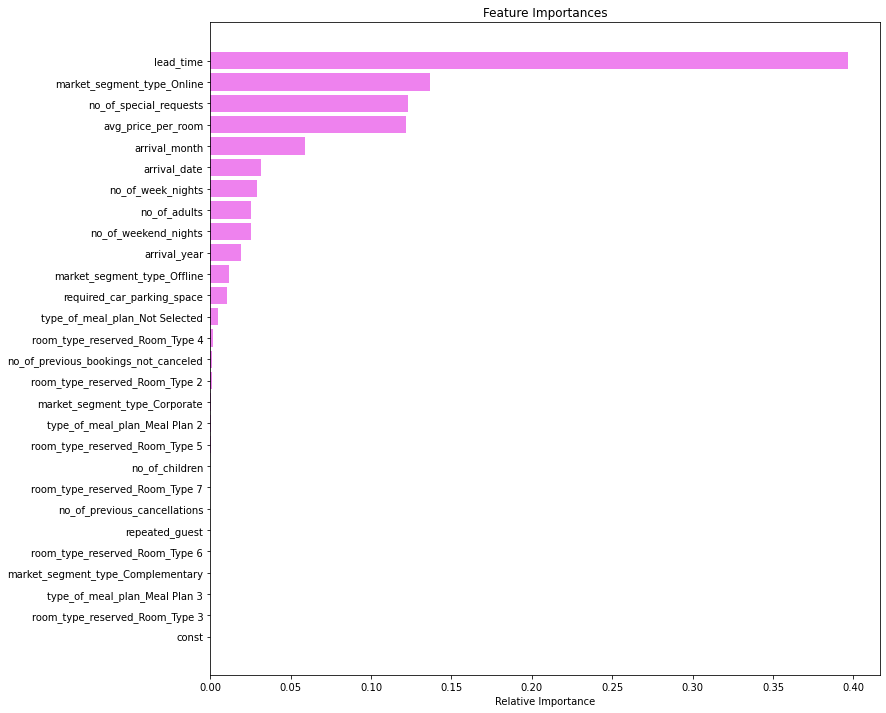

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Throughout this process, Lead Time has remained constant as the data point with the highest relative importance. Online market segment is a very distant second with number of special requests and average price per room in a virtual dead heat for third.

In [ ]:
# training performance comparison 

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83101,0.89520
Recall,0.98661,0.78620,0.89657
Precision,0.99578,0.72428,0.80676
F1,0.99117,0.75397,0.84929


Training scores are generally high as would be expected. F1 scores are comperable to Recall and Precision as would also be expected since F1 is closely associated with them.

In [ ]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87430,0.83497,0.86906
Recall,0.81403,0.78336,0.85349
Precision,0.80084,0.72758,0.76782
F1,0.80738,0.75444,0.80839


Testing scores are lower as we would expect but the dip isn't too bad. The post-pruning F1 score of .81 is very acceptable for our purposes.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

Cultivate business in the corporate sector. Reach out to local business 
hubs and convention centers to seek partnerships that might grow that segment of the business.<br><br>Seek to increase business with the aviation sector through relationship growth with local airlines that may have hub status at the nearest international or regional airports.<br><br>Consider creating a customer loyalty program to drive repeat business as this segment tends not to cancel but is very small in comparison to the number of new customers.<br><br>Tie this program to some of the available special requests the hotel offers as this is a feature that has shown some import in the data.<br><br>Once this is created, enure that basic information regarding the program is included in the hotel's listing on travel aggregation sites like Expedia and Kayak to maximize eposure to the online booking segment.<br><br>Consider an overall rate comparison with local competition. Many times cancellations are caused by a prospective customer finding a better deal elsewhere after booking.<br><br>Consider limiting the time a customer may book in advance as lead time has proven to be a major issue in cancellation.<br><br>Consider a cancellation penalty that escalates as lead time decreases. Cancellations six months out are not nearly so damaging to the hotel's ability to operate efficiently as cancellations that happen within, say, a week of the scheduled booking.